#Part 1

##1.1

##Quadratic Programming

In [ ]:
import numpy as np
import cvxopt

def solve_qp(K, y):

    n = len(y)

    K = K.astype(np.double)
    P = cvxopt.matrix(K)
    q = cvxopt.matrix(-np.ones((n, 1)))
    G = cvxopt.matrix(-np.eye(n))
    h = cvxopt.matrix(np.zeros(n))
    A = cvxopt.matrix(y.reshape(1, -1).astype(np.double))
    b = cvxopt.matrix(np.zeros(1))

    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)

    alpha = np.array(solution['x']).flatten()
    return alpha


X = np.array([[1, -1, 1], [-3, 1, 1], [-3, 1, -1], [1, 2, 1], [-1, -1, 2]])
y = np.array([-1, 1, -1, -1, 1])

K = np.dot(X, X.T)

alpha_values = solve_qp(K, y)
print("Alpha Values:", alpha_values)


Alpha Values: [0.14813745 0.09998717 0.03333975 0.09630057 0.1777906 ]


#Part 2

In [ ]:
#https://drive.google.com/file/d/1CAZXeWj3pUHU3sOPbAzpD6F91O1CQE4o/view?usp=sharing
!gdown 1CAZXeWj3pUHU3sOPbAzpD6F91O1CQE4o

Downloading...
From: https://drive.google.com/uc?id=1CAZXeWj3pUHU3sOPbAzpD6F91O1CQE4o
To: /content/PRSA_data_2010.1.1-2014.12.31.csv
100% 2.01M/2.01M [00:00<00:00, 153MB/s]


#1.2.2

In [ ]:
import pandas as pd
df=pd.read_csv('/content/PRSA_data_2010.1.1-2014.12.31.csv')
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


#1.2.3

## Checking missing values

1.   List item
2.   List item




In [ ]:

df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
pm2.5,2067
DEWP,0
TEMP,0
PRES,0
cbwd,0


##Filling missing values=>imputation

In [ ]:
# Filling missing values in the 'pm2.5' column with its mean
df['pm2.5'] = df['pm2.5'].fillna(df['pm2.5'].mean())

print(df.isnull().sum())

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64


#1.2.4

##Checking for categorical features

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(col, df[col].unique())

cbwd ['NW' 'cv' 'NE' 'SE']


##Encoding

In [ ]:

df['cbwd_encoded'] = df['cbwd'].astype('category').cat.codes

print(df[['cbwd', 'cbwd_encoded']].head())
df

  cbwd  cbwd_encoded
0   NW             1
1   NW             1
2   NW             1
3   NW             1
4   NW             1


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cbwd_encoded
0,1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0,1
1,2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0,1
2,3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0,1
3,4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0,1
4,5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.000000,-23,-2.0,1034.0,NW,231.97,0,0,1
43820,43821,2014,12,31,20,10.000000,-22,-3.0,1034.0,NW,237.78,0,0,1
43821,43822,2014,12,31,21,10.000000,-22,-3.0,1034.0,NW,242.70,0,0,1
43822,43823,2014,12,31,22,8.000000,-22,-4.0,1034.0,NW,246.72,0,0,1


#1.2.5

##Checking for outliers

In [ ]:

columns_to_check = ['Iws', 'DEWP', 'TEMP', 'pm2.5']

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Column: {col}")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Number of outliers: {len(outliers)}")
    print("-" * 20)

Column: Iws
  Q1: 1.79
  Q3: 21.91
  IQR: 20.12
  Lower Bound: -28.39
  Upper Bound: 52.09
  Number of outliers: 5101
--------------------
Column: DEWP
  Q1: -10.0
  Q3: 15.0
  IQR: 25.0
  Lower Bound: -47.5
  Upper Bound: 52.5
  Number of outliers: 0
--------------------
Column: TEMP
  Q1: 2.0
  Q3: 23.0
  IQR: 21.0
  Lower Bound: -29.5
  Upper Bound: 54.5
  Number of outliers: 0
--------------------
Column: pm2.5
  Q1: 31.0
  Q3: 132.0
  IQR: 101.0
  Lower Bound: -120.5
  Upper Bound: 283.5
  Number of outliers: 2117
--------------------


##Dealing with outliers

In [ ]:

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_val = df[col].median()
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_val

    print(f"Column: {col} (Outliers imputed with median)")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")

    outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"  Number of outliers after imputation: {len(outliers_after)}")
    print("-" * 20)

df.head()

Column: Iws (Outliers imputed with median)
  Q1: 1.79
  Q3: 21.91
  IQR: 20.12
  Lower Bound: -28.39
  Upper Bound: 52.09
  Number of outliers after imputation: 0
--------------------
Column: DEWP (Outliers imputed with median)
  Q1: -10.0
  Q3: 15.0
  IQR: 25.0
  Lower Bound: -47.5
  Upper Bound: 52.5
  Number of outliers after imputation: 0
--------------------
Column: TEMP (Outliers imputed with median)
  Q1: 2.0
  Q3: 23.0
  IQR: 21.0
  Lower Bound: -29.5
  Upper Bound: 54.5
  Number of outliers after imputation: 0
--------------------
Column: pm2.5 (Outliers imputed with median)
  Q1: 31.0
  Q3: 132.0
  IQR: 101.0
  Lower Bound: -120.5
  Upper Bound: 283.5
  Number of outliers after imputation: 0
--------------------


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cbwd_encoded
0,1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0,1
1,2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0,1
2,3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0,1
3,4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0,1
4,5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0,1


#1.2.6

##Classifying PM2.5

In [ ]:
import pandas as pd

def classify_pm25(pm25_value):

    if 0.0 <= pm25_value <= 12.0:
        return "Good"
    elif 12.1 <= pm25_value <= 35.4:
        return "Moderate"
    elif 35.5 <= pm25_value <= 55.4:
        return "Unhealthy for Sensitive Groups"
    elif 55.5 <= pm25_value <= 150.4:
        return "Unhealthy"
    elif 150.5 <= pm25_value <= 250.4:
        return "Very Unhealthy"
    elif 250.5 <= pm25_value <= 350.4:
        return "Hazardous"
    elif 350.5 <= pm25_value <= 500.0:
        return "Hazardous"
    else:
        return "Out of Range"

df['AQI Category'] = df['pm2.5'].apply(classify_pm25)

print(df[['pm2.5', 'AQI Category']].head())
df

       pm2.5 AQI Category
0  98.613215    Unhealthy
1  98.613215    Unhealthy
2  98.613215    Unhealthy
3  98.613215    Unhealthy
4  98.613215    Unhealthy


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cbwd_encoded,AQI Category
0,1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0,1,Unhealthy
1,2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0,1,Unhealthy
2,3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0,1,Unhealthy
3,4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0,1,Unhealthy
4,5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0,1,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.000000,-23,-2.0,1034.0,NW,5.37,0,0,1,Good
43820,43821,2014,12,31,20,10.000000,-22,-3.0,1034.0,NW,5.37,0,0,1,Good
43821,43822,2014,12,31,21,10.000000,-22,-3.0,1034.0,NW,5.37,0,0,1,Good
43822,43823,2014,12,31,22,8.000000,-22,-4.0,1034.0,NW,5.37,0,0,1,Good


In [ ]:
print(df['AQI Category'].unique())

['Unhealthy' 'Very Unhealthy' 'Unhealthy for Sensitive Groups' 'Moderate'
 'Hazardous' 'Good']


#1.2.7 Exploratory Data Analysis

#Lag features

In [ ]:

def add_lagged_columns(df, lag_hours):

  for lag in lag_hours:
    df[f'pm2.5_lag_{lag}h'] = df['pm2.5'].shift(lag)
  return df

df = add_lagged_columns(df, [2, 24])

print(df[['pm2.5', 'pm2.5_lag_2h', 'pm2.5_lag_24h']].head())
df


       pm2.5  pm2.5_lag_2h  pm2.5_lag_24h
0  98.613215           NaN            NaN
1  98.613215           NaN            NaN
2  98.613215     98.613215            NaN
3  98.613215     98.613215            NaN
4  98.613215     98.613215            NaN


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cbwd_encoded,AQI Category,pm2.5_lag_2h,pm2.5_lag_24h
0,1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0,1,Unhealthy,NaN,NaN
1,2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0,1,Unhealthy,NaN,NaN
2,3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0,1,Unhealthy,98.613215,NaN
3,4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0,1,Unhealthy,98.613215,NaN
4,5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0,1,Unhealthy,98.613215,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.000000,-23,-2.0,1034.0,NW,5.37,0,0,1,Good,9.000000,35.0
43820,43821,2014,12,31,20,10.000000,-22,-3.0,1034.0,NW,5.37,0,0,1,Good,10.000000,26.0
43821,43822,2014,12,31,21,10.000000,-22,-3.0,1034.0,NW,5.37,0,0,1,Good,8.000000,20.0
43822,43823,2014,12,31,22,8.000000,-22,-4.0,1034.0,NW,5.37,0,0,1,Good,10.000000,8.0


##Dealin with NaN values in lagged features

In [ ]:

for lag in [2, 24]:
    df[f'pm2.5_lag_{lag}h'] = df[f'pm2.5_lag_{lag}h'].fillna(df[f'pm2.5_lag_{lag}h'].mean())

print(df[[f'pm2.5_lag_{lag}h' for lag in [2, 24]]].isnull().sum())


pm2.5_lag_2h     0
pm2.5_lag_24h    0
dtype: int64


In [ ]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
pm2.5,0
DEWP,0
TEMP,0
PRES,0
cbwd,0


##Plotting lag_2 & lag_24

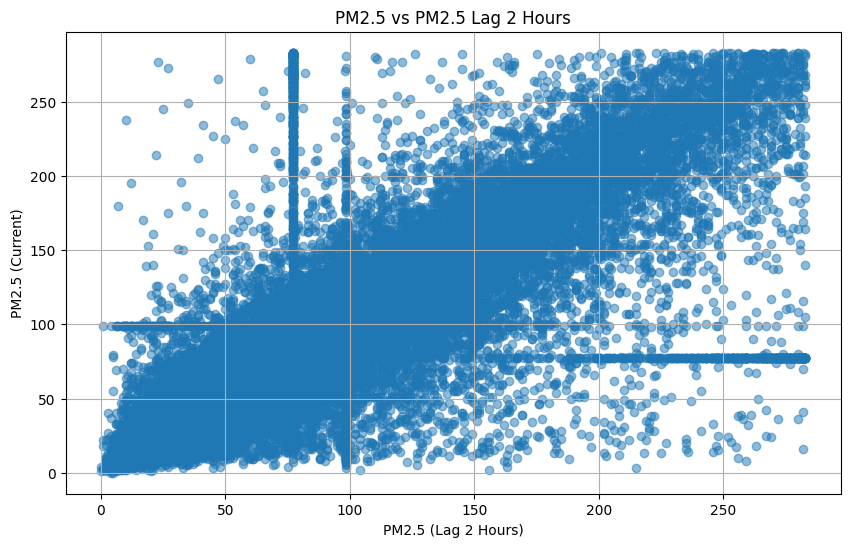

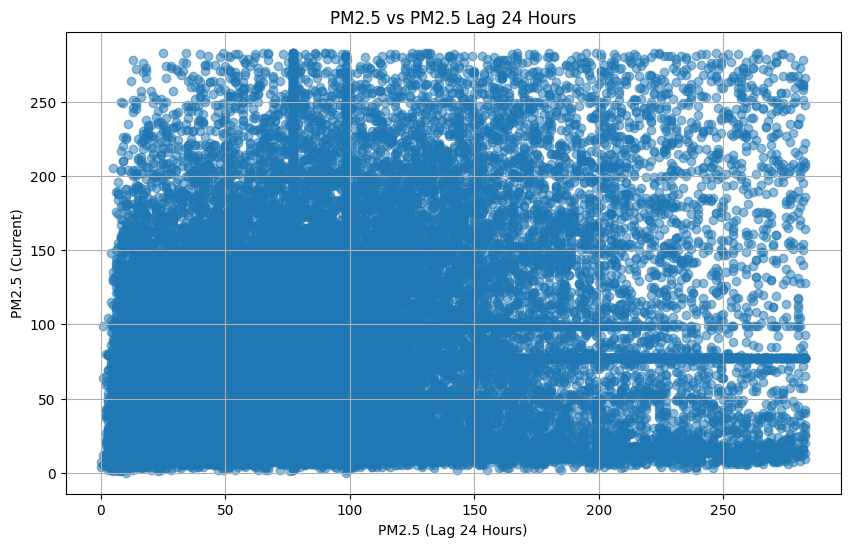

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['pm2.5_lag_2h'], df['pm2.5'], alpha=0.5)
plt.title('PM2.5 vs PM2.5 Lag 2 Hours')
plt.xlabel('PM2.5 (Lag 2 Hours)')
plt.ylabel('PM2.5 (Current)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['pm2.5_lag_24h'], df['pm2.5'], alpha=0.5)
plt.title('PM2.5 vs PM2.5 Lag 24 Hours')
plt.xlabel('PM2.5 (Lag 24 Hours)')
plt.ylabel('PM2.5 (Current)')
plt.grid(True)
plt.show()


##Correlation between PM2.5 and lagged features

Correlation Matrix:
                  pm2.5  pm2.5_lag_2h  pm2.5_lag_24h
pm2.5          1.000000      0.833316       0.257815
pm2.5_lag_2h   0.833316      1.000000       0.286305
pm2.5_lag_24h  0.257815      0.286305       1.000000


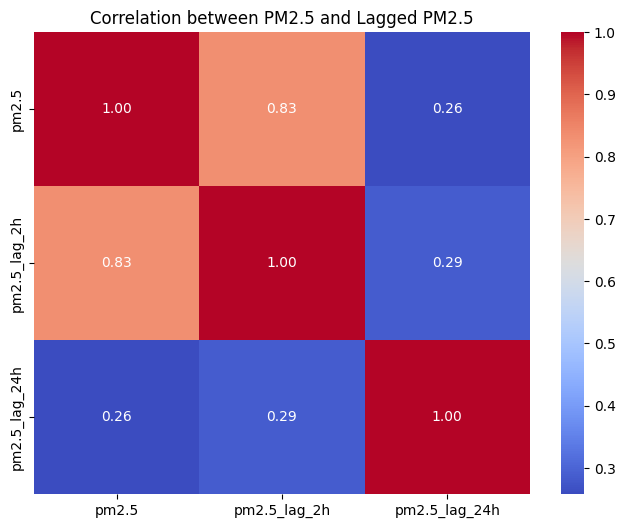

In [ ]:
import seaborn as sns

correlation_matrix = df[['pm2.5', 'pm2.5_lag_2h', 'pm2.5_lag_24h']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between PM2.5 and Lagged PM2.5')
plt.show()

Correlation of features with AQI Category:
AQI_Category_Encoded    1.000000
pm2.5                   0.571792
pm2.5_lag_2h            0.531646
DEWP                    0.269095
cbwd_encoded            0.240390
pm2.5_lag_24h           0.114992
TEMP                    0.085173
day                     0.031771
Is                      0.022692
hour                   -0.002215
Ir                     -0.025515
month                  -0.036269
year                   -0.045770
No                     -0.051604
Iws                    -0.056271
PRES                   -0.176149
Name: AQI_Category_Encoded, dtype: float64

Top 10 correlations with AQI Category:
pm2.5            0.571792
pm2.5_lag_2h     0.531646
DEWP             0.269095
cbwd_encoded     0.240390
pm2.5_lag_24h    0.114992
TEMP             0.085173
day              0.031771
Is               0.022692
hour            -0.002215
Ir              -0.025515
Name: AQI_Category_Encoded, dtype: float64


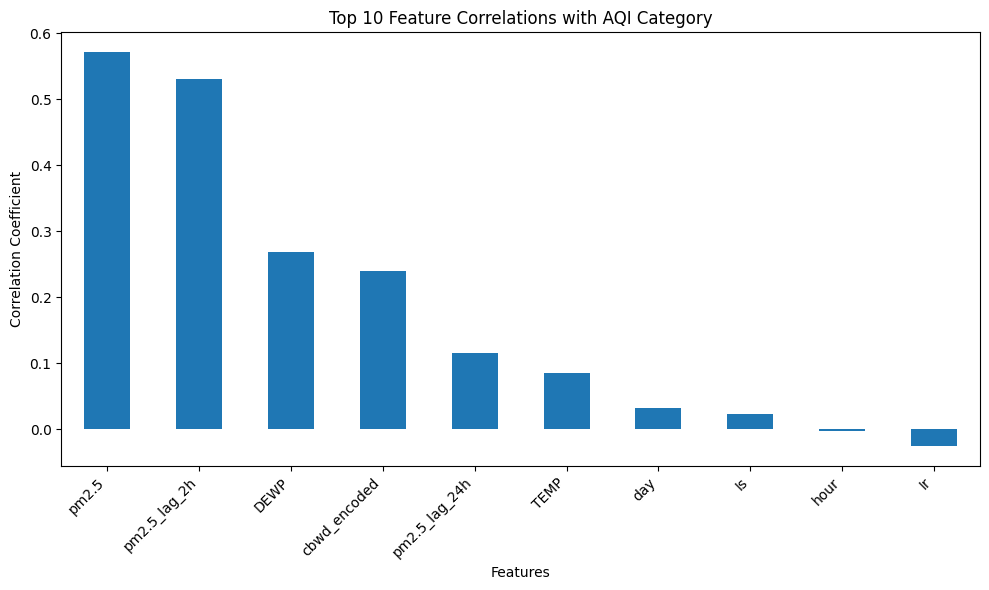

In [ ]:
# prompt: AQI category top 10 correlations

# 1.2.8
# ##Correlation with AQI Category

# Calculate correlation matrix for numerical columns and the encoded AQI Category
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Ensure 'AQI Category' is not in numerical_cols if it was accidentally included (shouldn't be after classification)
if 'AQI Category' in numerical_cols:
    numerical_cols.remove('AQI Category')

# Include the encoded 'cbwd_encoded' and 'AQI Category' (assuming it's already a numerical representation or you plan to one-hot encode it)
# If 'AQI Category' is still an object, you need to encode it to numerical for correlation
if df['AQI Category'].dtype == 'object':
    df['AQI_Category_Encoded'] = df['AQI Category'].astype('category').cat.codes
    cols_for_correlation = numerical_cols + ['AQI_Category_Encoded']
else:
    # If AQI Category is already numerical (e.g., if you used a numerical mapping)
    cols_for_correlation = numerical_cols + ['AQI Category']

correlation_with_aqi = df[cols_for_correlation].corr()['AQI_Category_Encoded'].sort_values(ascending=False)

print("Correlation of features with AQI Category:")
print(correlation_with_aqi)

# Get the top 10 correlations (excluding the correlation of AQI_Category_Encoded with itself)
top_10_correlations = correlation_with_aqi[1:].head(10)

print("\nTop 10 correlations with AQI Category:")
print(top_10_correlations)

# Optional: Visualize the top 10 correlations
plt.figure(figsize=(10, 6))
top_10_correlations.plot(kind='bar')
plt.title('Top 10 Feature Correlations with AQI Category')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Rolling Statistics

In [ ]:
window_size = 24
df = df.copy()
df['pm2.5_rolling_statistics'] = df['pm2.5'].rolling(window=window_size).mean()

print(df[['pm2.5_rolling_statistics']].tail())
df


       pm2.5_rolling_statistics
43819                 11.291667
43820                 10.625000
43821                 10.208333
43822                 10.208333
43823                 10.041667


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cbwd_encoded,AQI Category,pm2.5_lag_2h,pm2.5_lag_24h,AQI_Category_Encoded,pm2.5_rolling_statistics
0,1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0,1,Unhealthy,84.552771,84.590194,3,NaN
1,2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0,1,Unhealthy,84.552771,84.590194,3,NaN
2,3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0,1,Unhealthy,98.613215,84.590194,3,NaN
3,4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0,1,Unhealthy,98.613215,84.590194,3,NaN
4,5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0,1,Unhealthy,98.613215,84.590194,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.000000,-23,-2.0,1034.0,NW,5.37,0,0,1,Good,9.000000,35.000000,0,11.291667
43820,43821,2014,12,31,20,10.000000,-22,-3.0,1034.0,NW,5.37,0,0,1,Good,10.000000,26.000000,0,10.625000
43821,43822,2014,12,31,21,10.000000,-22,-3.0,1034.0,NW,5.37,0,0,1,Good,8.000000,20.000000,0,10.208333
43822,43823,2014,12,31,22,8.000000,-22,-4.0,1034.0,NW,5.37,0,0,1,Good,10.000000,8.000000,0,10.208333


##Dealing with NaN values in rolling statistics

In [ ]:

df['pm2.5_rolling_statistics'] = df['pm2.5_rolling_statistics'].fillna(df['pm2.5_rolling_statistics'].mean())

print(df['pm2.5_rolling_statistics'].isnull().sum())

0


In [ ]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cbwd_encoded,AQI Category,pm2.5_lag_2h,pm2.5_lag_24h,AQI_Category_Encoded,pm2.5_rolling_statistics
0,1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0,1,Unhealthy,84.552771,84.590194,3,84.565296
1,2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0,1,Unhealthy,84.552771,84.590194,3,84.565296
2,3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0,1,Unhealthy,98.613215,84.590194,3,84.565296
3,4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0,1,Unhealthy,98.613215,84.590194,3,84.565296
4,5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0,1,Unhealthy,98.613215,84.590194,3,84.565296


##Plotting pm2.5 vs Rolling statistics

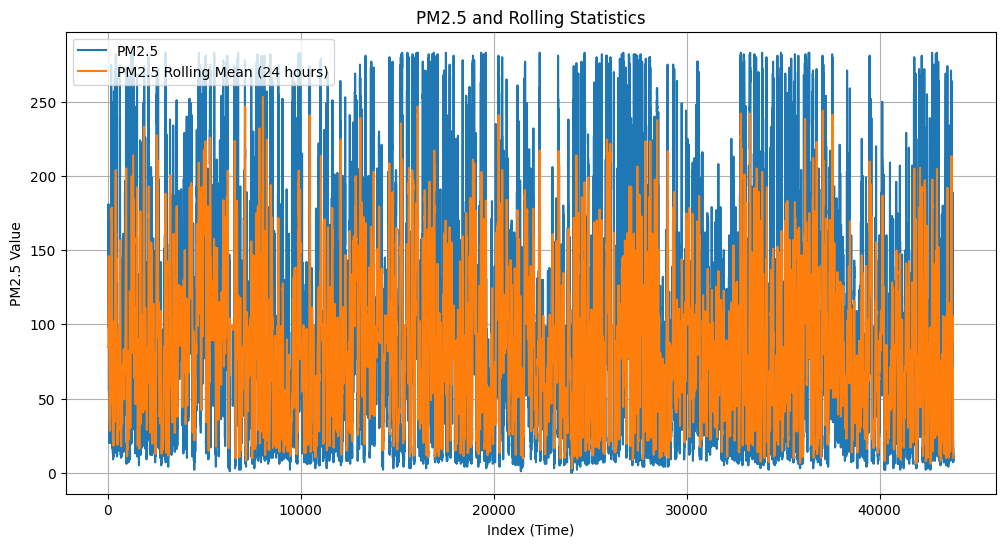

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['pm2.5'], label='PM2.5')
plt.plot(df.index, df['pm2.5_rolling_statistics'], label=f'PM2.5 Rolling Mean ({window_size} hours)')
plt.title('PM2.5 and Rolling Statistics')
plt.xlabel('Index (Time)')
plt.ylabel('PM2.5 Value')
plt.legend()
plt.grid(True)
plt.show()

#Cyclic Encoding

In [ ]:
def encode_cyclic(df, col, max_val):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col]/max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col]/max_val)
    return df

import numpy as np
df = encode_cyclic(df, 'year', df['year'].max())
df = encode_cyclic(df, 'month', 12)
df = encode_cyclic(df, 'day', 31)
df = encode_cyclic(df, 'hour', 23)

print(df[['year', 'year_sin', 'year_cos',
          'month', 'month_sin', 'month_cos',
          'day', 'day_sin', 'day_cos',
          'hour', 'hour_sin', 'hour_cos']].head())

df.head()

   year  year_sin  year_cos  month  month_sin  month_cos  day   day_sin  \
0  2010 -0.012479  0.999922      1        0.5   0.866025    1  0.201299   
1  2010 -0.012479  0.999922      1        0.5   0.866025    1  0.201299   
2  2010 -0.012479  0.999922      1        0.5   0.866025    1  0.201299   
3  2010 -0.012479  0.999922      1        0.5   0.866025    1  0.201299   
4  2010 -0.012479  0.999922      1        0.5   0.866025    1  0.201299   

   day_cos  hour  hour_sin  hour_cos  
0  0.97953     0  0.000000  1.000000  
1  0.97953     1  0.269797  0.962917  
2  0.97953     2  0.519584  0.854419  
3  0.97953     3  0.730836  0.682553  
4  0.97953     4  0.887885  0.460065  


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,...,AQI_Category_Encoded,pm2.5_rolling_statistics,year_sin,year_cos,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos
0,1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,...,3,84.565296,-0.012479,0.999922,0.5,0.866025,0.201299,0.97953,0.000000,1.000000
1,2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,...,3,84.565296,-0.012479,0.999922,0.5,0.866025,0.201299,0.97953,0.269797,0.962917
2,3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,...,3,84.565296,-0.012479,0.999922,0.5,0.866025,0.201299,0.97953,0.519584,0.854419
3,4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,...,3,84.565296,-0.012479,0.999922,0.5,0.866025,0.201299,0.97953,0.730836,0.682553
4,5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,...,3,84.565296,-0.012479,0.999922,0.5,0.866025,0.201299,0.97953,0.887885,0.460065


##Encoded scatter plot of ‘hour’

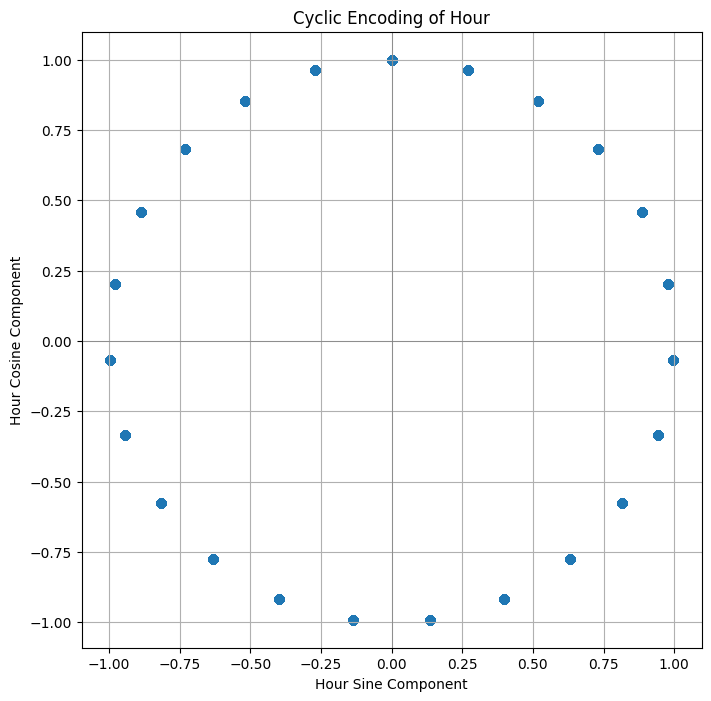

In [ ]:

plt.figure(figsize=(8, 8))
plt.scatter(df['hour_sin'], df['hour_cos'])
plt.title('Cyclic Encoding of Hour')
plt.xlabel('Hour Sine Component')
plt.ylabel('Hour Cosine Component')
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.show()

##Advanced time series features

##Seasonal index column

In [ ]:
def get_season(month):
  if month in [12, 1, 2]:
    return 'Winter'
  elif month in [3, 4, 5]:
    return 'Spring'
  elif month in [6, 7, 8]:
    return 'Summer'
  else:
    return 'Autumn'

df['season'] = df['month'].apply(get_season)
print(df[['month', 'season']].head())
print(df[['month', 'season']].tail())
df

   month  season
0      1  Winter
1      1  Winter
2      1  Winter
3      1  Winter
4      1  Winter
       month  season
43819     12  Winter
43820     12  Winter
43821     12  Winter
43822     12  Winter
43823     12  Winter


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,...,pm2.5_rolling_statistics,year_sin,year_cos,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,season
0,1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,...,84.565296,-1.247869e-02,0.999922,5.000000e-01,0.866025,2.012985e-01,0.97953,0.000000e+00,1.000000,Winter
1,2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,...,84.565296,-1.247869e-02,0.999922,5.000000e-01,0.866025,2.012985e-01,0.97953,2.697968e-01,0.962917,Winter
2,3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,...,84.565296,-1.247869e-02,0.999922,5.000000e-01,0.866025,2.012985e-01,0.97953,5.195840e-01,0.854419,Winter
3,4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,...,84.565296,-1.247869e-02,0.999922,5.000000e-01,0.866025,2.012985e-01,0.97953,7.308360e-01,0.682553,Winter
4,5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,...,84.565296,-1.247869e-02,0.999922,5.000000e-01,0.866025,2.012985e-01,0.97953,8.878852e-01,0.460065,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.000000,-23,-2.0,1034.0,NW,...,11.291667,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-8.878852e-01,0.460065,Winter
43820,43821,2014,12,31,20,10.000000,-22,-3.0,1034.0,NW,...,10.625000,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-7.308360e-01,0.682553,Winter
43821,43822,2014,12,31,21,10.000000,-22,-3.0,1034.0,NW,...,10.208333,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-5.195840e-01,0.854419,Winter
43822,43823,2014,12,31,22,8.000000,-22,-4.0,1034.0,NW,...,10.208333,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-2.697968e-01,0.962917,Winter


##Season with the most pollution

Proportion of AQI Categories by Season:
AQI Category      Good  Hazardous  Moderate  Unhealthy  \
season                                                   
Autumn        0.112821   0.031044  0.182418   0.426465   
Spring        0.068478   0.016757  0.202627   0.458424   
Summer        0.040851   0.009058  0.162138   0.512047   
Winter        0.087583   0.028825  0.250739   0.411678   

AQI Category  Unhealthy for Sensitive Groups  Very Unhealthy  
season                                                        
Autumn                              0.106685        0.140568  
Spring                              0.128895        0.124819  
Summer                              0.132065        0.143841  
Winter                              0.088415        0.132761  

Pollution Score (Sum of Proportions of Unhealthy, Very Unhealthy, Hazardous) by Season:
season
Autumn    0.598077
Spring    0.600000
Summer    0.664946
Winter    0.573263
dtype: float64

Season with the most pollution (highest propo

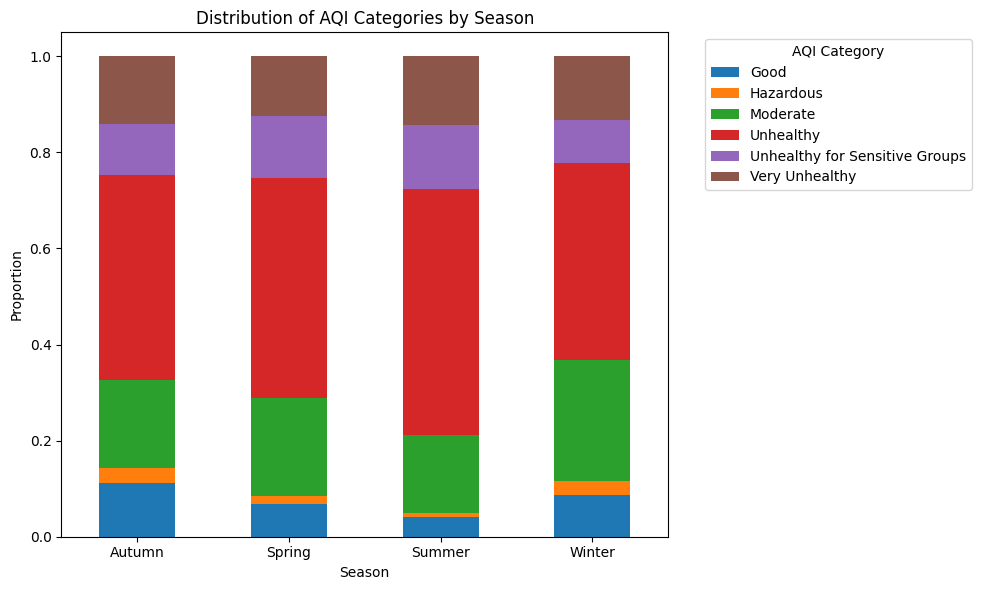

In [ ]:

season_aqi_counts = df.groupby('season')['AQI Category'].value_counts(normalize=True).unstack(fill_value=0)

print("Proportion of AQI Categories by Season:")
print(season_aqi_counts)
polluted_categories = ['Unhealthy', 'Very Unhealthy', 'Hazardous']
season_pollution_score = season_aqi_counts[polluted_categories].sum(axis=1)

print("\nPollution Score (Sum of Proportions of Unhealthy, Very Unhealthy, Hazardous) by Season:")
print(season_pollution_score)

most_polluted_season = season_pollution_score.idxmax()

print(f"\nSeason with the most pollution (highest proportion of Unhealthy+): {most_polluted_season}")

season_aqi_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of AQI Categories by Season')
plt.xlabel('Season')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='AQI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##Polluted days of the week

Proportion of AQI Categories by Day of the Week:
AQI Category          Good  Hazardous  Moderate  Unhealthy  \
day_of_week_name                                             
Monday            0.085409   0.025702  0.201948   0.458333   
Tuesday           0.077905   0.017880  0.202586   0.449553   
Wednesday         0.088761   0.026022  0.221264   0.423691   
Thursday          0.083814   0.017308  0.208974   0.427885   
Friday            0.057152   0.021392  0.190294   0.473499   
Saturday          0.063857   0.022989  0.178640   0.469668   
Sunday            0.084132   0.018199  0.191252   0.464240   

AQI Category      Unhealthy for Sensitive Groups  Very Unhealthy  
day_of_week_name                                                  
Monday                                  0.110951        0.117656  
Tuesday                                 0.106801        0.145275  
Wednesday                               0.114783        0.125479  
Thursday                                0.117628        0

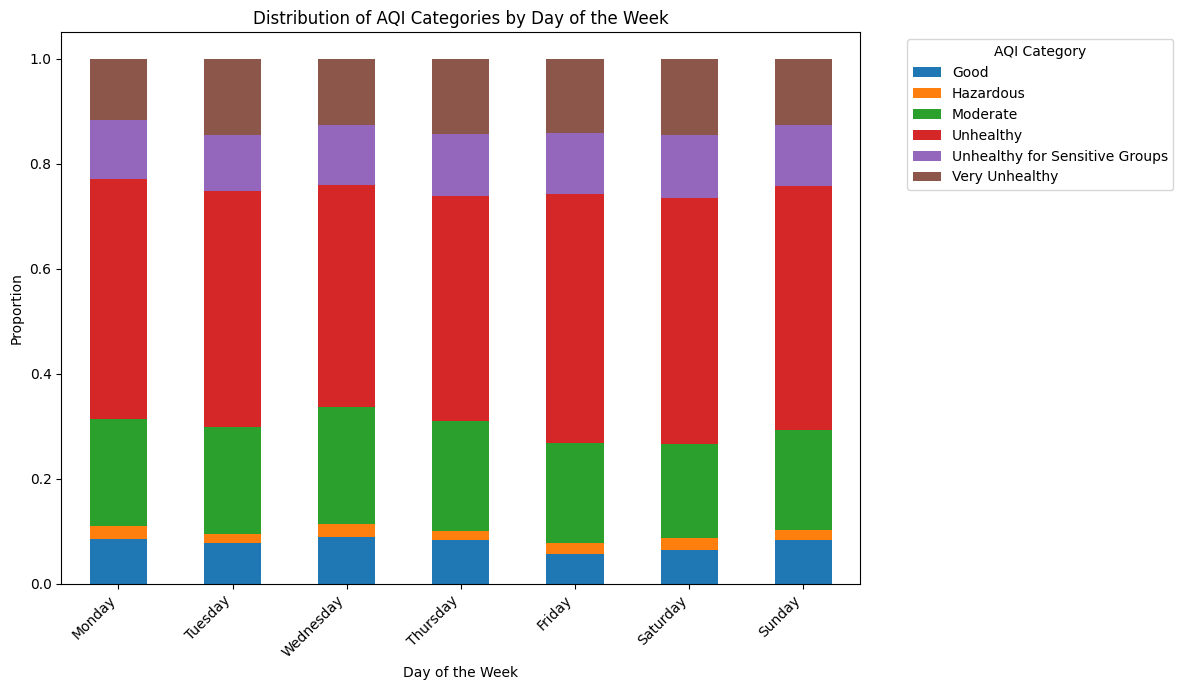

In [ ]:

df['day_of_week'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']]).dt.dayofweek

day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_of_week_name'] = df['day_of_week'].map(day_names)

day_aqi_counts = df.groupby('day_of_week_name')['AQI Category'].value_counts(normalize=True).unstack(fill_value=0)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_aqi_counts = day_aqi_counts.reindex(day_order)

print("Proportion of AQI Categories by Day of the Week:")
print(day_aqi_counts)

polluted_categories = ['Unhealthy', 'Very Unhealthy', 'Hazardous']

day_pollution_score = day_aqi_counts[polluted_categories].sum(axis=1)

print("\nPollution Score (Sum of Proportions of Unhealthy, Very Unhealthy, Hazardous) by Day of the Week:")
print(day_pollution_score)

most_polluted_day = day_pollution_score.idxmax()

print(f"\nDay of the week with the most pollution (highest proportion of Unhealthy+): {most_polluted_day}")

day_aqi_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribution of AQI Categories by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='AQI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##Effect of environmental factors on pollution

###Correlation Matrix

Correlation Matrix between PM2.5 and Environmental Factors:
          pm2.5       Iws      TEMP      PRES
pm2.5  1.000000 -0.107427  0.022482 -0.138304
Iws   -0.107427  1.000000  0.099422 -0.057010
TEMP   0.022482  0.099422  1.000000 -0.826690
PRES  -0.138304 -0.057010 -0.826690  1.000000


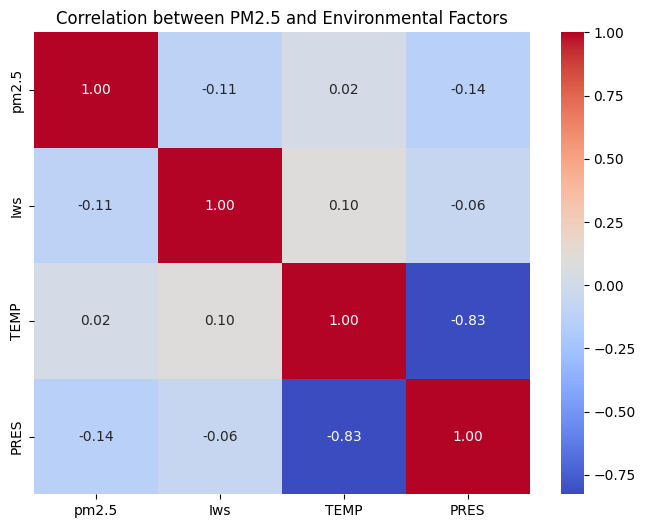

In [ ]:
correlation_matrix_environmental = df[['pm2.5', 'Iws', 'TEMP','PRES']].corr()
print("Correlation Matrix between PM2.5 and Environmental Factors:")
print(correlation_matrix_environmental)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_environmental, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between PM2.5 and Environmental Factors')
plt.show()

###Pair plot

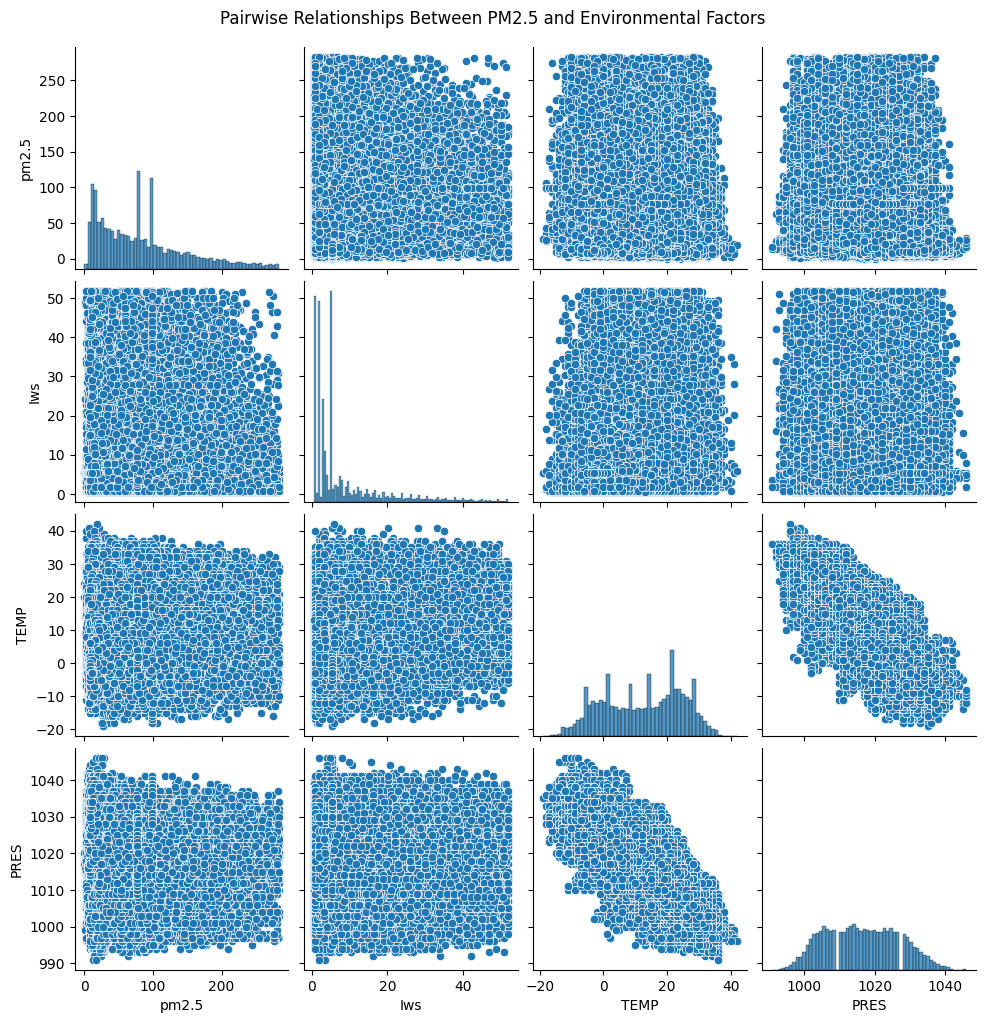

In [ ]:

sns.pairplot(df[['pm2.5', 'Iws', 'TEMP','PRES']])
plt.suptitle('Pairwise Relationships Between PM2.5 and Environmental Factors', y=1.02) # Add a title
plt.show()

### Hourly Pattern

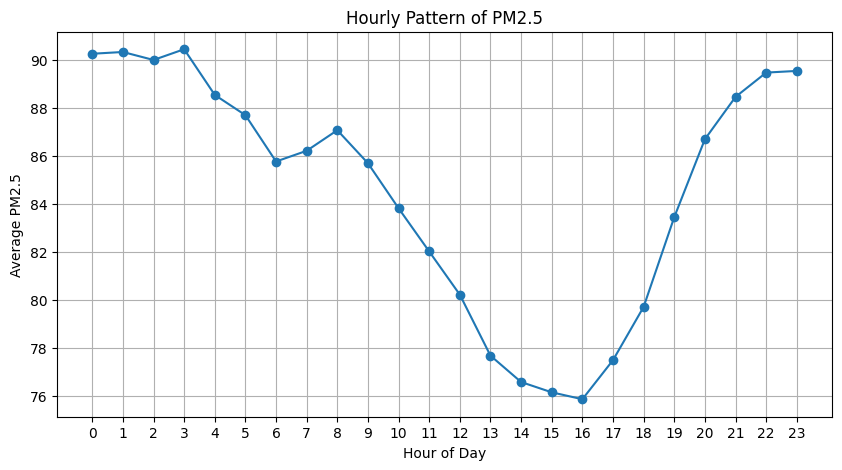

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
hourly_mean = df.groupby('hour')['pm2.5'].mean()

plt.figure(figsize=(10,5))
plt.plot(hourly_mean.index, hourly_mean.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average PM2.5')
plt.title('Hourly Pattern of PM2.5')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


#1.2.8 Data Visualization

##pm2.5 based hour/day/month/year

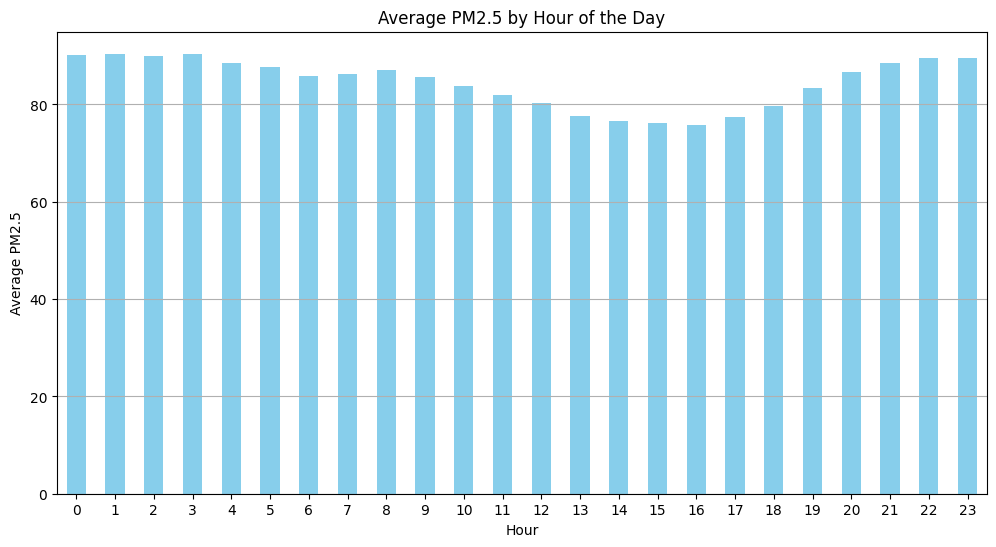

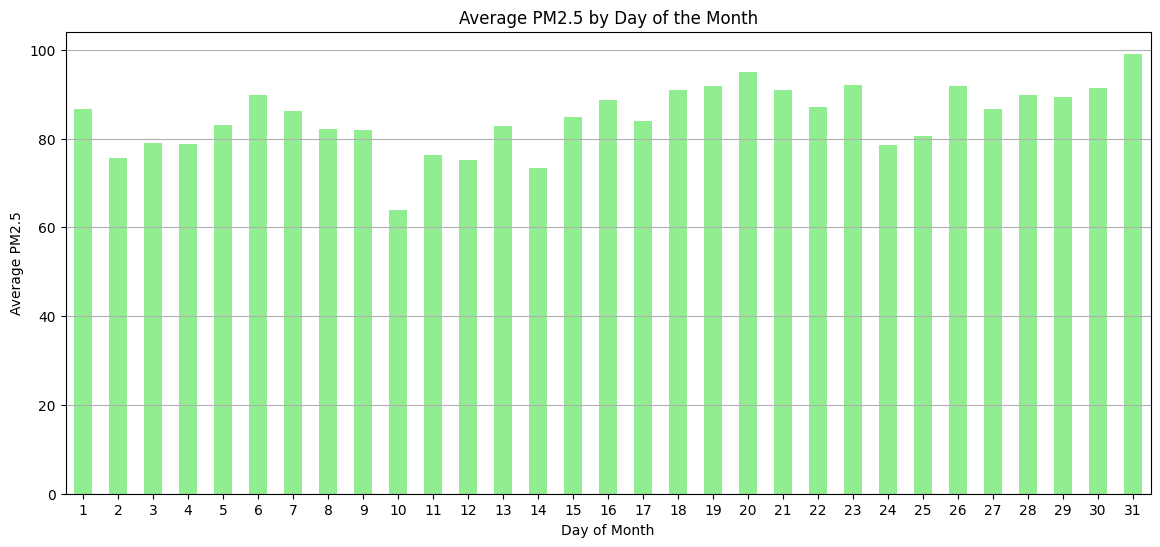

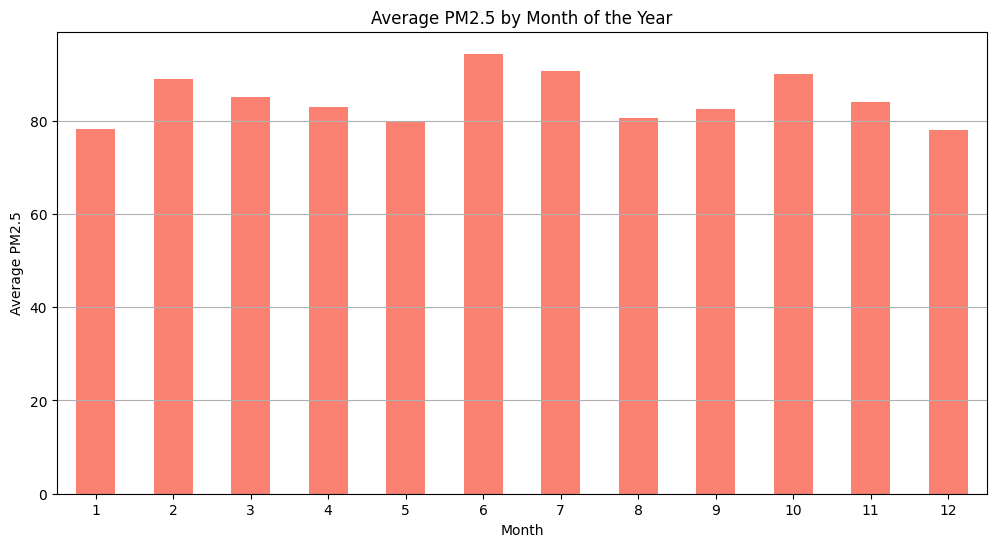

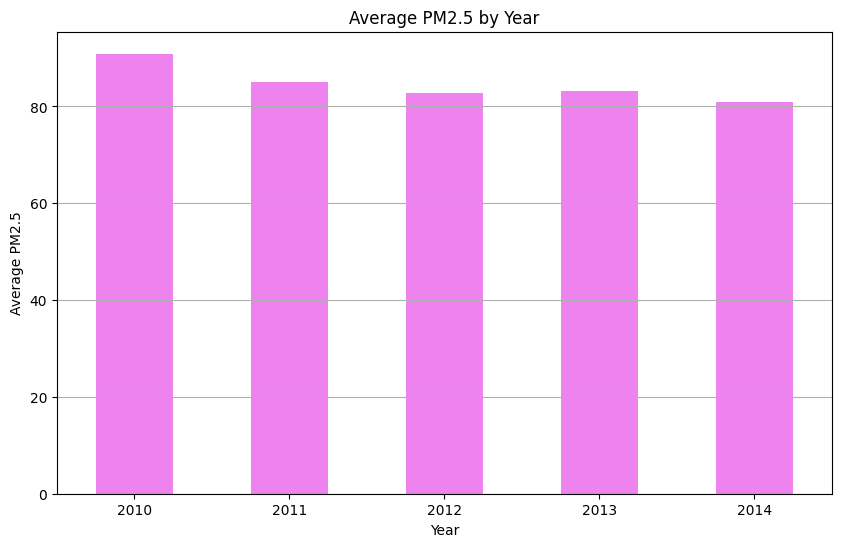

In [ ]:
hourly_pm25 = df.groupby('hour')['pm2.5'].mean()

plt.figure(figsize=(12, 6))
hourly_pm25.plot(kind='bar', color='skyblue')
plt.title('Average PM2.5 by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

daily_pm25 = df.groupby('day')['pm2.5'].mean()

plt.figure(figsize=(14, 6))
daily_pm25.plot(kind='bar', color='lightgreen')
plt.title('Average PM2.5 by Day of the Month')
plt.xlabel('Day of Month')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

monthly_pm25 = df.groupby('month')['pm2.5'].mean()

plt.figure(figsize=(12, 6))
monthly_pm25.plot(kind='bar', color='salmon')
plt.title('Average PM2.5 by Month of the Year')
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

yearly_pm25 = df.groupby('year')['pm2.5'].mean()

plt.figure(figsize=(10, 6))
yearly_pm25.plot(kind='bar', color='violet')
plt.title('Average PM2.5 by Year')
plt.xlabel('Year')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

##Adding a new column for showing year,month,day & hour in one

In [ ]:
df['year_month_day_hour'] = df['year'].astype(str) + '-' + \
                            df['month'].astype(str).str.zfill(2) + '-' + \
                            df['day'].astype(str).str.zfill(2) + ' ' + \
                            df['hour'].astype(str).str.zfill(2)

df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,...,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,season,day_of_week,day_of_week_name,year_month_day_hour
0,1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,...,0.5,0.866025,0.201299,0.97953,0.000000,1.000000,Winter,4,Friday,2010-01-01 00
1,2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,...,0.5,0.866025,0.201299,0.97953,0.269797,0.962917,Winter,4,Friday,2010-01-01 01
2,3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,...,0.5,0.866025,0.201299,0.97953,0.519584,0.854419,Winter,4,Friday,2010-01-01 02
3,4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,...,0.5,0.866025,0.201299,0.97953,0.730836,0.682553,Winter,4,Friday,2010-01-01 03
4,5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,...,0.5,0.866025,0.201299,0.97953,0.887885,0.460065,Winter,4,Friday,2010-01-01 04


In [ ]:
df['year_month_day_hour'].head()

,year_month_day_hour
0,2010-01-01 00
1,2010-01-01 01
2,2010-01-01 02
3,2010-01-01 03
4,2010-01-01 04


##PM2.5 over time plot

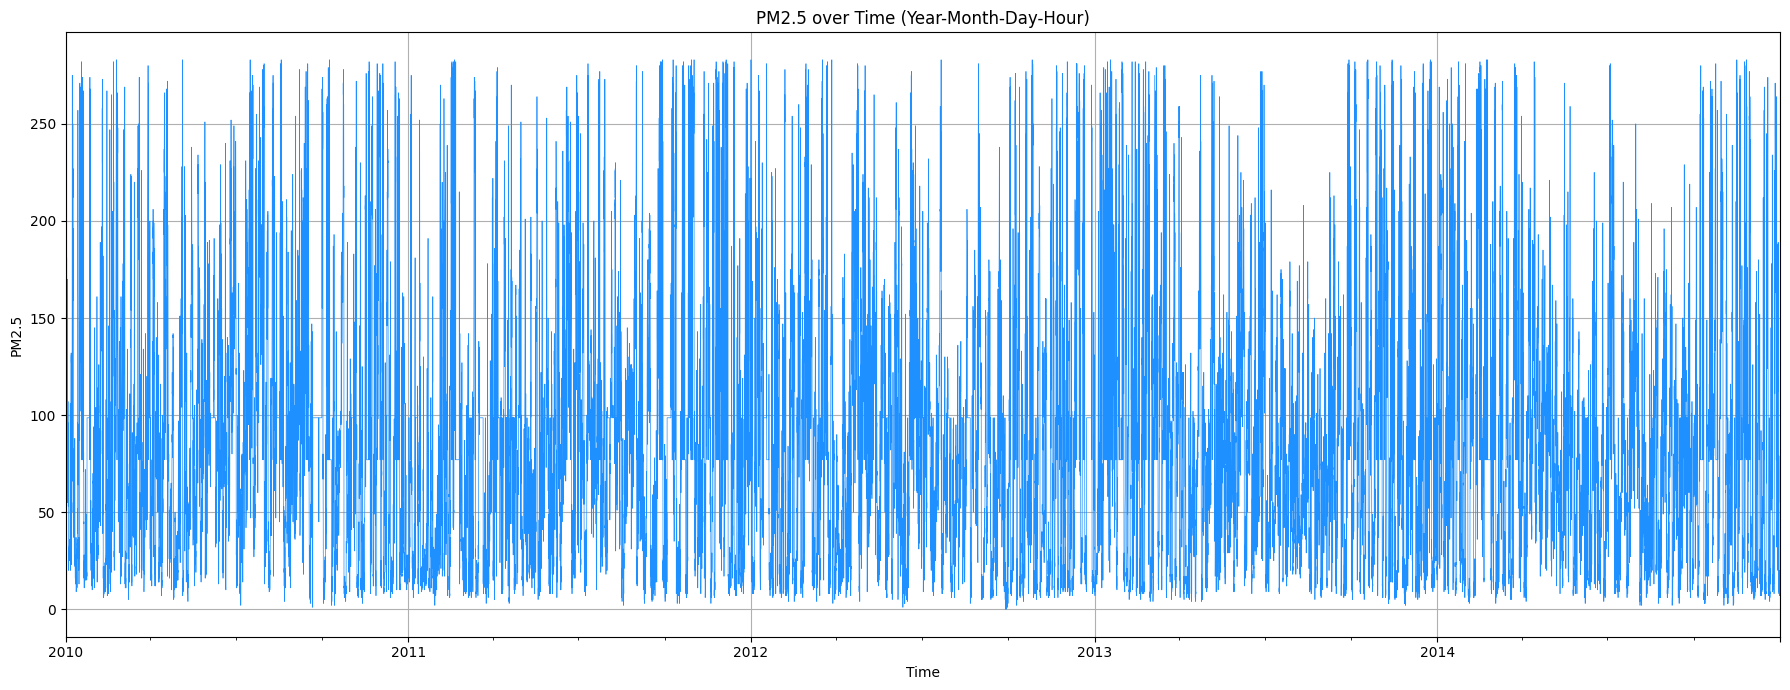

In [ ]:

df['year_month_day_hour'] = pd.to_datetime(df['year_month_day_hour'])
df_sorted = df.sort_values(by='year_month_day_hour')

df_sorted = df_sorted.set_index('year_month_day_hour')

plt.figure(figsize=(18, 7))
df_sorted['pm2.5'].plot(linewidth=0.5, color='dodgerblue')
plt.title('PM2.5 over Time (Year-Month-Day-Hour)')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.grid(True)
plt.tight_layout()
plt.show()

##Maximum air pollution date/dates

In [ ]:

max_pm25_datetime = df_sorted['pm2.5'].idxmax()
max_pm25_value = df_sorted['pm2.5'].max()

print(f"The maximum PM2.5 value of {max_pm25_value:.2f} occurred at {max_pm25_datetime}")

top_n = 10
top_pm25_dates = df_sorted['pm2.5'].nlargest(top_n)

print(f"\nTop {top_n} dates and times with the highest PM2.5 values:")
top_pm25_dates

The maximum PM2.5 value of 283.00 occurred at 2010-02-24 00:00:00

Top 10 dates and times with the highest PM2.5 values:


,pm2.5
year_month_day_hour,
2010-02-24 00:00:00,283.0
2010-05-05 10:00:00,283.0
2010-07-16 12:00:00,283.0
2010-08-18 14:00:00,283.0
2010-10-09 03:00:00,283.0
2010-10-09 04:00:00,283.0
2011-02-19 03:00:00,283.0
2011-09-28 14:00:00,283.0
2011-10-10 00:00:00,283.0


## The least PM2.5:January or December?

In [ ]:
january_pm25 = monthly_pm25[1]
december_pm25 = monthly_pm25[12]
if january_pm25 < december_pm25:
  print(f"January has the least average PM2.5 ({january_pm25:.2f}) compared to December ({december_pm25:.2f}).")
elif december_pm25 < january_pm25:
  print(f"December has the least average PM2.5 ({december_pm25:.2f}) compared to January ({january_pm25:.2f}).")
else:
  print(f"January and December have the same average PM2.5 ({january_pm25:.2f}).")


December has the least average PM2.5 (77.95) compared to January (78.23).


#1.2.9

#1.2.10

##Normalizing=>Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_numeric = df.drop(['cbwd', 'AQI Category', 'year_month_day_hour', 'season', 'day_of_week_name'], axis=1)

df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

print("Normalized DataFrame (StandardScaler):")
print(df_scaled.head())

df_scaled.info()
df_scaled

Normalized DataFrame (StandardScaler):
         No      year    month       day      hour     pm2.5      DEWP  \
0 -1.732011 -1.414601 -1.60171 -1.673744 -1.661325  0.220415 -1.580878   
1 -1.731932 -1.414601 -1.60171 -1.673744 -1.516862  0.220415 -1.580878   
2 -1.731853 -1.414601 -1.60171 -1.673744 -1.372399  0.220415 -1.580878   
3 -1.731774 -1.414601 -1.60171 -1.673744 -1.227936  0.220415 -1.580878   
4 -1.731695 -1.414601 -1.60171 -1.673744 -1.083473  0.220415 -1.511594   

       TEMP      PRES       Iws  ...  pm2.5_rolling_statistics  year_sin  \
0 -1.922250  0.443328 -0.662748  ...              2.861132e-16 -1.414586   
1 -2.004228  0.345943 -0.383120  ...              2.861132e-16 -1.414586   
2 -1.922250  0.248559 -0.223204  ...              2.861132e-16 -1.414586   
3 -2.168183  0.248559  0.056424  ...              2.861132e-16 -1.414586   
4 -2.004228  0.151174  0.336053  ...              2.861132e-16 -1.414586   

   year_cos  month_sin  month_cos   day_sin   day_cos      

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,...,pm2.5_rolling_statistics,year_sin,year_cos,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,day_of_week
0,-1.732011,-1.414601,-1.601710,-1.673744,-1.661325,0.220415,-1.580878,-1.922250,0.443328,-0.662748,...,2.861132e-16,-1.414586,-1.695752,0.715432,1.225370,0.280207,1.424427,5.363773e-17,1.330124,0.499863
1,-1.731932,-1.414601,-1.601710,-1.673744,-1.516862,0.220415,-1.580878,-2.004228,0.345943,-0.383120,...,2.861132e-16,-1.414586,-1.695752,0.715432,1.225370,0.280207,1.424427,3.897566e-01,1.278655,0.499863
2,-1.731853,-1.414601,-1.601710,-1.673744,-1.372399,0.220415,-1.580878,-1.922250,0.248559,-0.223204,...,2.861132e-16,-1.414586,-1.695752,0.715432,1.225370,0.280207,1.424427,7.506067e-01,1.128065,0.499863
3,-1.731774,-1.414601,-1.601710,-1.673744,-1.227936,0.220415,-1.580878,-2.168183,0.248559,0.056424,...,2.861132e-16,-1.414586,-1.695752,0.715432,1.225370,0.280207,1.424427,1.055788e+00,0.889522,0.499863
4,-1.731695,-1.414601,-1.601710,-1.673744,-1.083473,0.220415,-1.511594,-2.004228,0.151174,0.336053,...,2.861132e-16,-1.414586,-1.695752,0.715432,1.225370,0.280207,1.424427,1.282666e+00,0.580718,0.499863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,1.731695,1.414601,1.588052,1.735608,1.083473,-1.199719,-1.719447,-1.184453,1.709325,-0.342917,...,-1.475249e+00,1.414613,1.017160,0.006949,1.414478,-0.001984,1.453646,-1.282666e+00,0.580718,-0.499863
43820,1.731774,1.414601,1.588052,1.735608,1.227936,-1.168374,-1.650162,-1.266431,1.709325,-0.342917,...,-1.488672e+00,1.414613,1.017160,0.006949,1.414478,-0.001984,1.453646,-1.055788e+00,0.889522,-0.499863
43821,1.731853,1.414601,1.588052,1.735608,1.372399,-1.168374,-1.650162,-1.266431,1.709325,-0.342917,...,-1.497061e+00,1.414613,1.017160,0.006949,1.414478,-0.001984,1.453646,-7.506067e-01,1.128065,-0.499863
43822,1.731932,1.414601,1.588052,1.735608,1.516862,-1.199719,-1.650162,-1.348408,1.709325,-0.342917,...,-1.497061e+00,1.414613,1.017160,0.006949,1.414478,-0.001984,1.453646,-3.897566e-01,1.278655,-0.499863


#1.2.11

##Train_Test_Validation

In [ ]:
from sklearn.model_selection import train_test_split


X = df_scaled.drop('pm2.5', axis=1)
y = df_scaled['pm2.5']


X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, shuffle=False
)

validation_size_relative_to_train_val = 0.15 / 0.85

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=validation_size_relative_to_train_val, random_state=42, shuffle=False
)

print("Shape of the splits:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val:   {X_val.shape}, y_val:   {y_val.shape}")
print(f"X_test:  {X_test.shape}, y_test:  {y_test.shape}")

total_samples = len(df_scaled)
print(f"\nProportions:")
print(f"Train: {len(X_train)/total_samples:.2f}")
print(f"Validation: {len(X_val)/total_samples:.2f}")
print(f"Test: {len(X_test)/total_samples:.2f}")

Shape of the splits:
X_train: (30676, 25), y_train: (30676,)
X_val:   (6574, 25), y_val:   (6574,)
X_test:  (6574, 25), y_test:  (6574,)

Proportions:
Train: 0.70
Validation: 0.15
Test: 0.15


#1.2.13

##Linear Kernel

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

linear_svr = LinearSVR(epsilon=0.0, C=1.0, random_state=42, max_iter=3000)
linear_svr.fit(X_train, y_train)

y_pred = linear_svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear SVR Evaluation Metrics:")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R-squared (R2): {r2:.4f}")

Linear SVR Evaluation Metrics:
  Mean Absolute Error (MAE): 0.2620
  Mean Squared Error (MSE): 0.2054
  Root Mean Squared Error (RMSE): 0.4533
  R-squared (R2): 0.7490


##Polynomial kernel

In [ ]:

from sklearn.svm import SVR


polynomial_svr = SVR(kernel='poly', degree=3, C=1.0, gamma='scale', coef0=0.0)

polynomial_svr.fit(X_train, y_train)

y_pred_poly = polynomial_svr.predict(X_test)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = math.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial SVR (degree=3) Evaluation Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_poly:.4f}")
print(f"  Mean Squared Error (MSE): {mse_poly:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_poly:.4f}")
print(f"  R-squared (R2): {r2_poly:.4f}")



Polynomial SVR (degree=3) Evaluation Metrics:
  Mean Absolute Error (MAE): 0.3460
  Mean Squared Error (MSE): 0.2491
  Root Mean Squared Error (RMSE): 0.4991
  R-squared (R2): 0.6956


##RBF kernel

In [ ]:

rbf_svr = SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1)

rbf_svr.fit(X_train, y_train)

y_pred_rbf = rbf_svr.predict(X_test)

mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
rmse_rbf = math.sqrt(mse_rbf)
r2_rbf = r2_score(y_test, y_pred_rbf)

print("RBF SVR Evaluation Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_rbf:.4f}")
print(f"  Mean Squared Error (MSE): {mse_rbf:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rbf:.4f}")
print(f"  R-squared (R2): {r2_rbf:.4f}")

RBF SVR Evaluation Metrics:
  Mean Absolute Error (MAE): 0.2918
  Mean Squared Error (MSE): 0.1660
  Root Mean Squared Error (RMSE): 0.4074
  R-squared (R2): 0.7972


##Comparing results

In [ ]:

print("\n--- Comparison of SVR Kernels ---")
print("Linear SVR:")
print(f"  MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")
print("Polynomial SVR (degree=3):")
print(f"  MAE: {mae_poly:.4f}, MSE: {mse_poly:.4f}, RMSE: {rmse_poly:.4f}, R2: {r2_poly:.4f}")
print("RBF SVR:")
print(f"  MAE: {mae_rbf:.4f}, MSE: {mse_rbf:.4f}, RMSE: {rmse_rbf:.4f}, R2: {r2_rbf:.4f}")

best_model = None
best_r2 = -float('inf')

if r2 > best_r2:
    best_r2 = r2
    best_model = "Linear SVR"

if r2_poly > best_r2:
    best_r2 = r2_poly
    best_model = "Polynomial SVR (degree=3)"

if r2_rbf > best_r2:
    best_r2 = r2_rbf
    best_model = "RBF SVR"

print(f"\nBased on R-squared (R2), the {best_model} performs the best.")

# Alternatively, you can compare based on the lowest RMSE or MAE
# For example, using RMSE:
best_rmse = float('inf')
best_model_rmse = None

if rmse < best_rmse:
    best_rmse = rmse
    best_model_rmse = "Linear SVR"

if rmse_poly < best_rmse:
    best_rmse = rmse_poly
    best_model_rmse = "Polynomial SVR (degree=3)"

if rmse_rbf < best_rmse:
    best_rmse = rmse_rbf
    best_model_rmse = "RBF SVR"

print(f"Based on Root Mean Squared Error (RMSE), the {best_model_rmse} performs the best.")



--- Comparison of SVR Kernels ---
Linear SVR:
  MAE: 0.2620, MSE: 0.2054, RMSE: 0.4533, R2: 0.7490
Polynomial SVR (degree=3):
  MAE: 0.3460, MSE: 0.2491, RMSE: 0.4991, R2: 0.6956
RBF SVR:
  MAE: 0.2918, MSE: 0.1660, RMSE: 0.4074, R2: 0.7972

Based on R-squared (R2), the RBF SVR performs the best.
Based on Root Mean Squared Error (RMSE), the RBF SVR performs the best.
